# Perception

## Reading in Color Images
The "perception step" in this case will actually be several steps, but it all begins with reading in images from the rover camera. In order to navigate autonomously through the environment, you will need to use these 320x160 pixel camera images to determine where it is possible to drive. In general, this can be a very complicated task, but in this case, we've simplified things a bit.

Throughout the environment, the sand on the ground is very light in color and everything else in the environment is dark. All you have to do to determine where you can drive is to figure out where the areas of lighter color are. As an example of how to do this, we'll look at the above image using Python. 

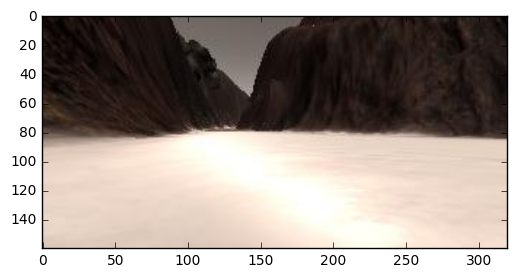

In [67]:
# Import some packages from matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
#%matplotlib inline

# Define the filename, read and plot the image
filename = 'IMG/robocam_2018_11_16_14_24_15_835.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

Now you have your image stored as an array and you can perform operations on it. First off, you can explore what it's size and datatype are, as well as the minimum and maximum values in the array using the numpy package (and check out this crash course on using numpy with images for more details on the direction we're going here) :

In [2]:
# Import the "numpy" package for working with arrays
import numpy as np
print(image.dtype, image.shape, np.min(image), np.max(image))
# uint8 (160, 320, 3) 0 255

(dtype('uint8'), (160, 320, 3), 0, 255)


So, here we can see it's an 8-bit unsigned integer array (uint8), where the size of the array is (160, 320, 3) meaning the image size is 160 pixels in the y-direction (height), 320 pixels in the x-direction (width) and it has 3 layers or "color channels".

We can also see that the minimum and maximum values are 0 and 255, respectively. This comes from the fact that with 8 bits of information for each pixel in each color channel, you have 
2
8
2 
8
  or 256 possible values, with the minimum possible value being 0 and the maximum being 255. Not all images are scaled this way so it's always a good idea to check the range and data type of the array after reading in an image if you're not sure.

The three color channels of the image are red, green and blue or "RGB" for short. The combination of intensity values across the three channels determines what color we see in the image. You can look at each of the color channels in isolation by zeroing out the others and lining them up side by side like this:

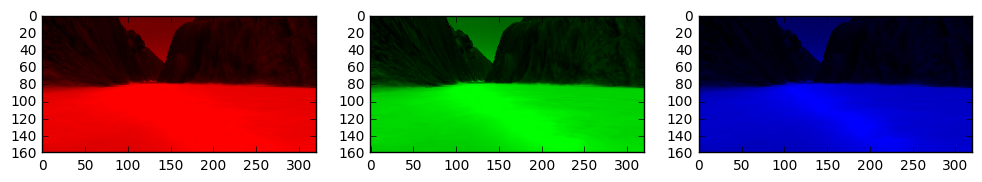

In [68]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show() 

## Color Thresholding
You can see now that, while the mountains are relatively dark (low intensity values) in all three color channels, both the ground and the sky are brighter (higher intensity) in the red, green and blue channels. However, in all cases it looks like the ground is a bit brighter than the sky, such that it should be possible to identify pixels associated with the ground using a simple color threshold.

In this next exercise, your task is to write a function that takes as its input a color image and a 3-tuple of color threshold values (integer values from 0 to 255), and outputs a single-channel binary image, which is to say an image with a single color channel where every pixel is set to one or zero. In this case, all pixels that were above the threshold should be assigned a value of 1, and those below a value of 0, like this:

In [69]:
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                 & (img[:,:,1] > rgb_thresh[1]) \
                 & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

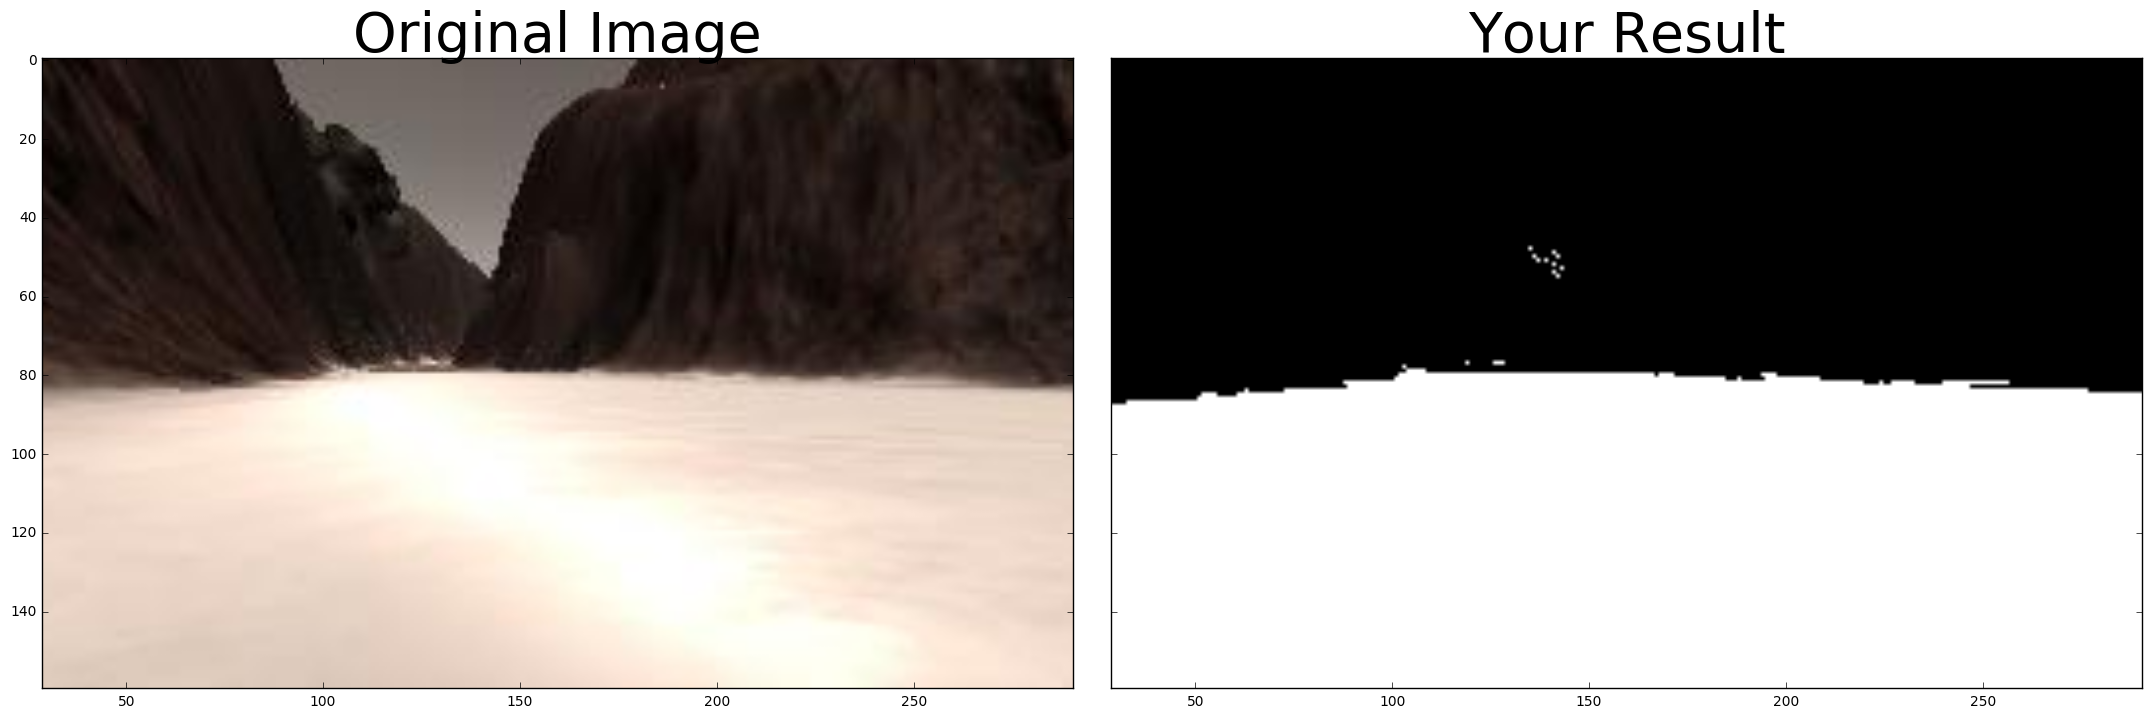

In [92]:


# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine